# Sonar Mines vs Rocks 


***Description***:

The focus of this project will be the Sonar Mines vs Rocks dataset. The problem is to predict metal or rock objects from sonar return data. Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The label associated with each record contains the letter R if the object is a rock and M if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

***Problem Statement***: Predict metal or rock objects from sonar return data

***Methodology***:

The following steps are adapted to perform the prediction:

1. Loading the Dataset
2. Data Analysis 
3. Data Splitting
4. Model Building
5. Model Evaluation

***Dataset***: The dataset used is [Mines vs Rocks]('https://www.kaggle.com/datasets/mattcarter865/mines-vs-rocks/code') from Kaggle.

## 1. Loading the Dataset

In [18]:
# Import modules

# os module for file operations
import os
# Modules for Data Manipulation
import math
import numpy as np
import pandas as pd
# Modules for Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

from IPython.display import display

# Sckit-learn module for Model building and evaluation 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')

In [19]:
# Load dataset

df = pd.read_csv('sonar.all-data.csv', header=None)
print('Dataset Shape: ',df.shape)

Dataset Shape:  (208, 61)


The dataset has 208 rows with 61 columns. There is no naming for the features. The last column is the output feature.

## 2. Data Analysis

**2.1 Exploratory Data Analysis (EDA)** 

In EDA, the aim is to perform activities such as data visualization, summary statistics,correlation analysis, and data distribution analysis.

***a.Summary Statistics***

In [20]:
# Find column stats
df.describe() 

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [21]:
# explore the columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [22]:
# Number of mines and rocks
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

The dataset is almost balanced. We have 111 data for mines and 97 data for rocks.

***b.Data Distribution***

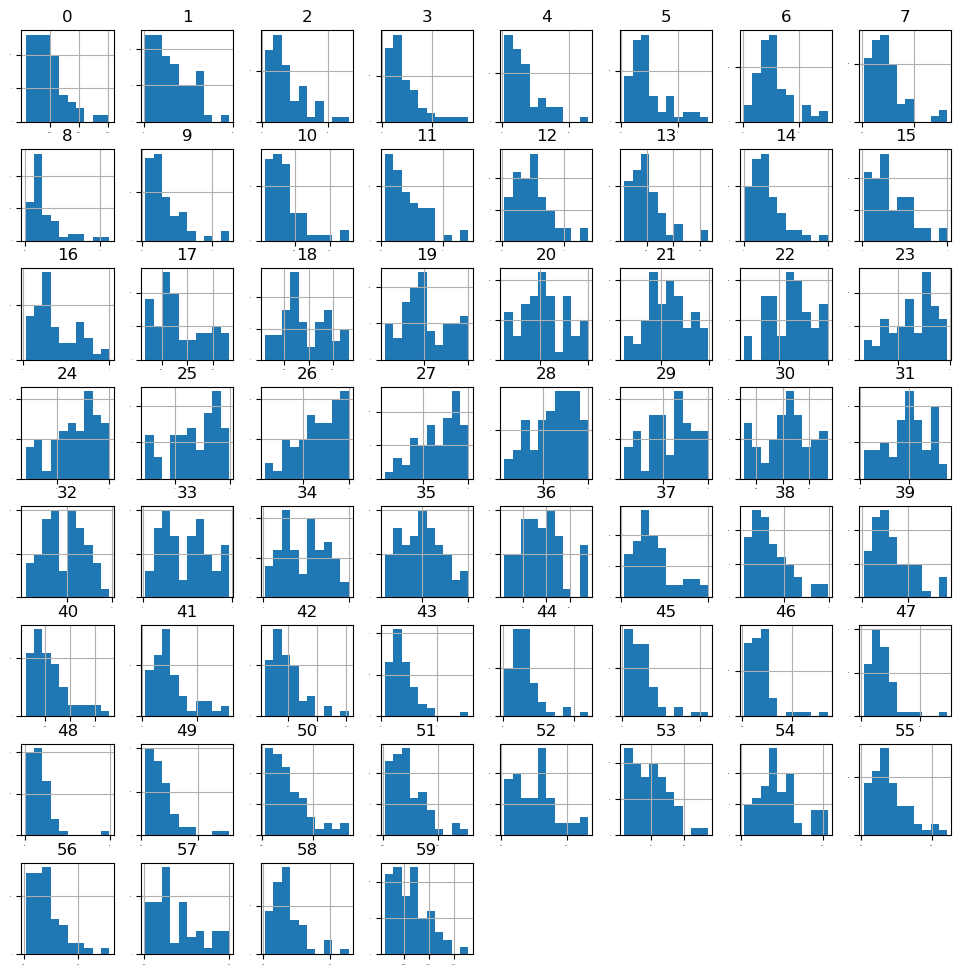

In [23]:
# Data Distribution of features using Histogram
df[:60].hist(xlabelsize=1, ylabelsize=1, figsize=(12,12)) 
plt.show()

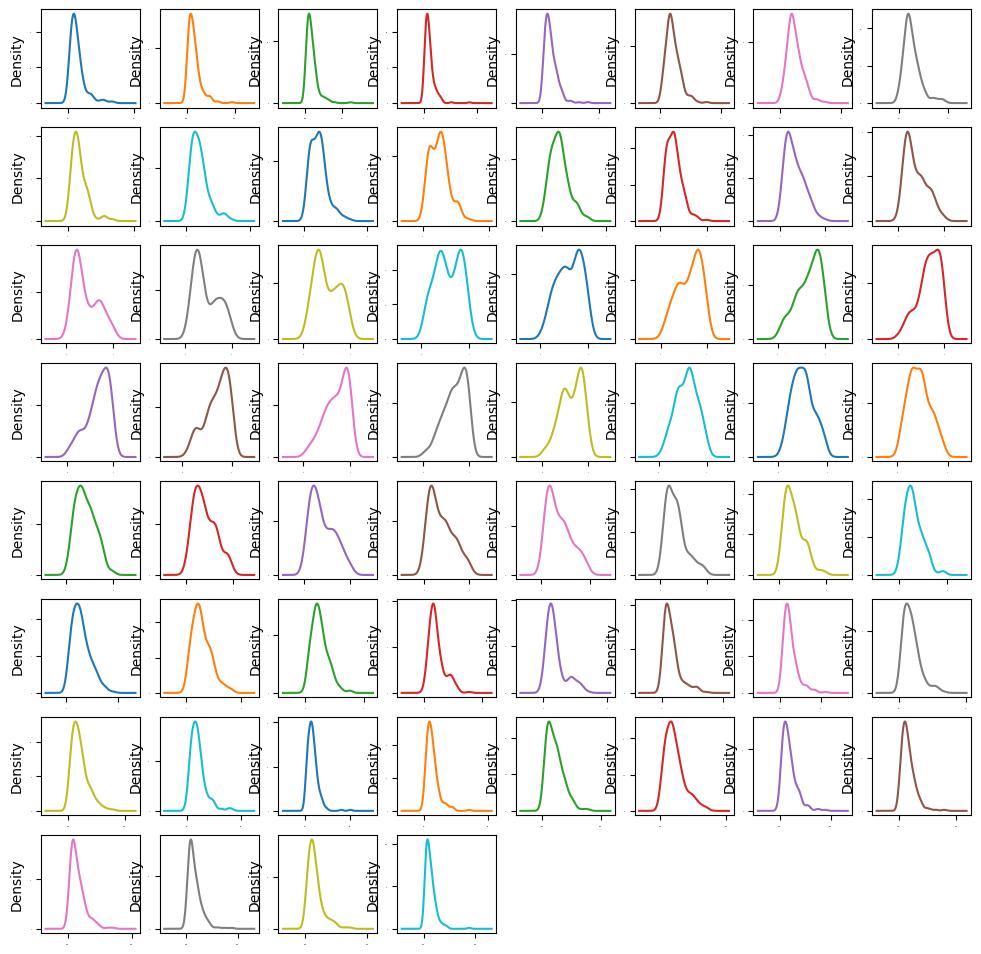

In [24]:
# Data Distribution of features using KDE
df.plot(kind='kde', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(12,12))
plt.show()

***c. Correlation Analysis***

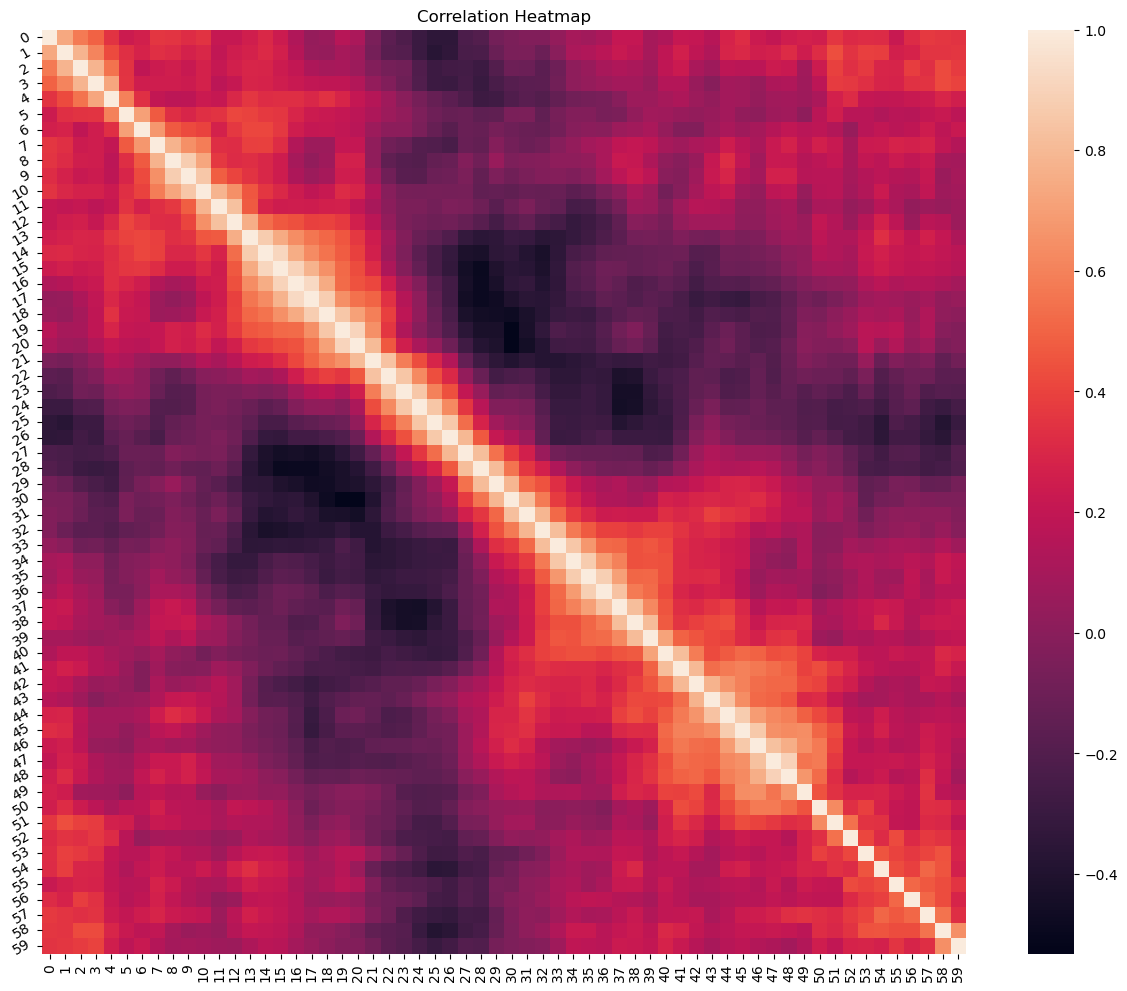

In [25]:
# Define correlation matrix
corr = df.loc[:, :59].corr()

#Plot the correlation matrix
plt.figure(figsize=(16,12))
ax = sns.heatmap(corr, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.title('Correlation Heatmap')
plt.show();

**2.2 Handle Missing Data**

In [26]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64


In [27]:
# Check for duplicate values
df.duplicated().sum()

0

From above analysis, we can conclude that dataset is free of missing values and duplicates.

### 3. Data Splitting

In [29]:
# Choose features and target of the model 
features = df.iloc[:,:-1]
target = df.iloc[:,-1]

# Feature scaling
sc = StandardScaler()
df_scaled = sc.fit_transform(features)

X = df_scaled[:, :59]
y = df.loc[:,60]
lab = preprocessing.LabelEncoder()
Y = lab.fit_transform(y)

print('The Datset consists of {} features & {} samples.\n'.format(X.shape[1], X.shape[0]))

The Datset consists of 59 features & 208 samples.



In [30]:
# Split dataset into train and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

print('Features data:',X.shape)
print('Target Data:',Y.shape)
print('Training dataset:', X_train.shape,Y_train.shape)
print('Testing dataset:', X_test.shape, Y_test.shape)

Features data: (208, 59)
Target Data: (208,)
Training dataset: (166, 59) (166,)
Testing dataset: (42, 59) (42,)


### 4. Model Building

Let's train the dataset on five top classifier models and choose best model for classification

In [31]:
# Models for prediction
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier' : RandomForestClassifier(),
    'Gradient Boosting Classifier' : GradientBoostingClassifier()
}

In [32]:
Pred ={}

# Fitting Training and Testing data to different models
for name, mod in models.items():
    mod.fit(X_train, Y_train)
    Pred1 = mod.predict(X_train)
    Pred2 = mod.predict(X_test)
    Pred[name]=[Pred1,Pred2]

Logistic Regression
SVM
Decision Tree Classifier
Random Forest Classifier
Gradient Boosting Classifier


### 5.Model Evalution

In [ ]:
#Let us first define a function to evaluate our models
Eval_Matrix = pd.DataFrame(np.zeros([5,2]), columns=['Train_accuracy','Test_accuracy'])
Train_accuracy = []
Test_accuracy = []

def Evaluate(n,name, pred1,pred2):
    #Plotting predicted predictions alongside the actual datapoints 
    print(f'Evaluation of {name}')
    
    #Evaluating the Model  
    training_score = round(accuracy_score(pred1,Y_train)*100,4)
    test_score = round(accuracy_score(pred2,Y_test)*100,4)
    
    Train_accuracy.append(training_score)
    Test_accuracy.append(test_score)
    
    print(f"Accuracy on training dataset: {training_score}%")
    print(f"Accuracy on testing dataset: {test_score}%\n")
    
    Eval_Matrix.loc[n,'Train_accuracy']  = training_score
    Eval_Matrix.loc[n,'Test_accuracy']   = test_score

In [ ]:
n = 0
# Evaluating the models
for name,pred in Pred.items():
    Evaluate(n,name,pred[0],pred[1])
    n += 1

Let's plot Accuracy score for all the models to choose best model

In [ ]:
index = ['Logistic Regression', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier']

def plot_accuracy(train, test,label1, label2, title):
    plt.bar(np.arange(5), train, width=0.3, label=label1)
    plt.bar(np.arange(5)+0.3, test, width=0.3, label=label2)
    plt.xticks(np.arange(5), index, rotation =35)
    plt.title(title)
    plt.legend()
    plt.ylim([0,1.1e2])
    plt.show()

plot_accuracy(Train_accuracy, Test_accuracy, 'Training Accuracy', 'Testing Accuracy', 'Accuracy Comparison for various Classifier Models')

From above plotting, we can observe 'Decision Tree Classifier', 'Random Forest Classifier' and 'Gradient Boosting Classifier' have 100% accuracy on trainign dataset. But accuracy decreases below 90% for testing dataset. 

Therefore, SVM is the best model with highest accuracy 98.19% on training dataset and 90.47% on testing data.

In [ ]:
# Classification report and confusion matrix for SVM model
print('\033[1mTraining Data Metrics: \n\033[0m')
print('Confusion Matrix:\n',confusion_matrix(Y_train, Pred['SVM'][0]))
print('\nClassification Report:\n',classification_report(Y_train, Pred['SVM'][0]))
    
print('\033[1mTesting Data Metrics: \n\033[0m')
print('Condusion Matrix:\n',confusion_matrix(Y_test, Pred['SVM'][1]))
print('\nClassification Report:\n',classification_report(Y_test, Pred['SVM'][1]))